In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error

from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf

In [72]:
dataset = pd.read_csv('./datasets/recurrent_fault.csv')
dataset.head()

,Node_CPU_Utiliztion,Node_Load_Average,Node Memory Utilization,Node_Disk_Utilization,Node_Disk_read_MB,Node_Disk_write_MB,Node_network_receive_kb,Node_network_transmit_kb
0,15.867,8.00,27.974,13.336,0.051,0.037,15.900,3.503
1,15.256,7.00,27.992,13.337,0.003,0.051,16.487,4.654
2,15.317,9.25,27.996,13.337,0.003,0.042,14.199,4.825
3,15.561,7.25,27.993,13.338,0.003,0.042,17.794,3.530
4,8.611,15.75,27.619,13.339,0.095,0.064,17.941,4.066


In [74]:
cols = dataset.columns
cols
dataset[cols[0]]

0       15.867
1       15.256
2       15.317
3       15.561
4        8.611
         ...  
9239     8.406
9240     8.317
9241     8.611
9242     8.639
9243     8.217
Name: Node_CPU_Utiliztion, Length: 9244, dtype: float64

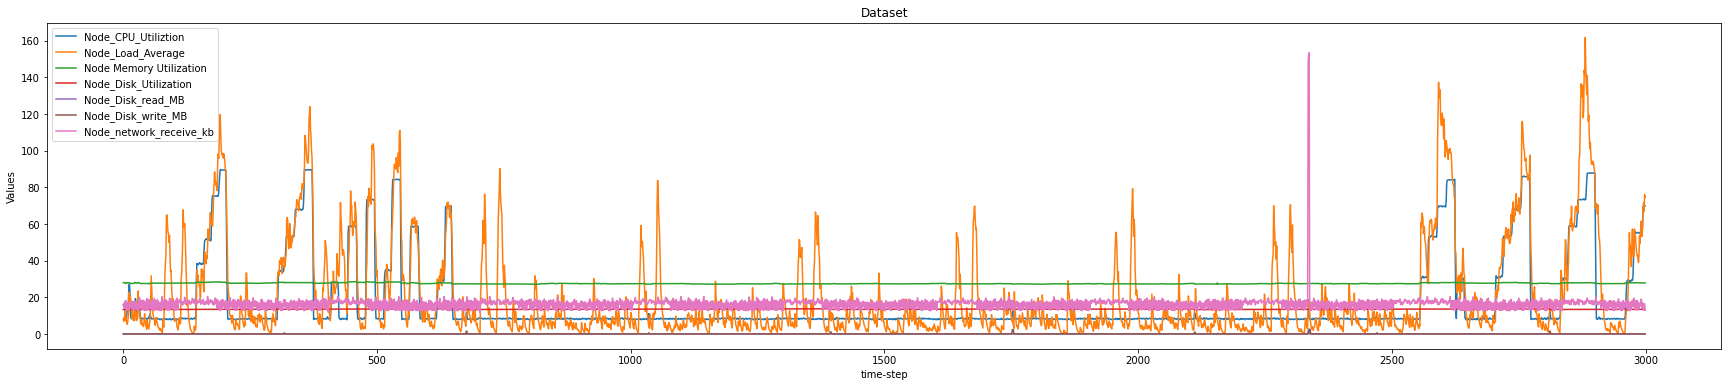

In [75]:
plt.figure(figsize = (30,6))
for i in range(len(cols) - 1):
    plt.plot(dataset[cols[i]][:3000], label = '{}'.format(cols[i]))   
plt.xlabel('time-step')
plt.ylabel('Values')
plt.title('Dataset')
plt.legend()
plt.show()

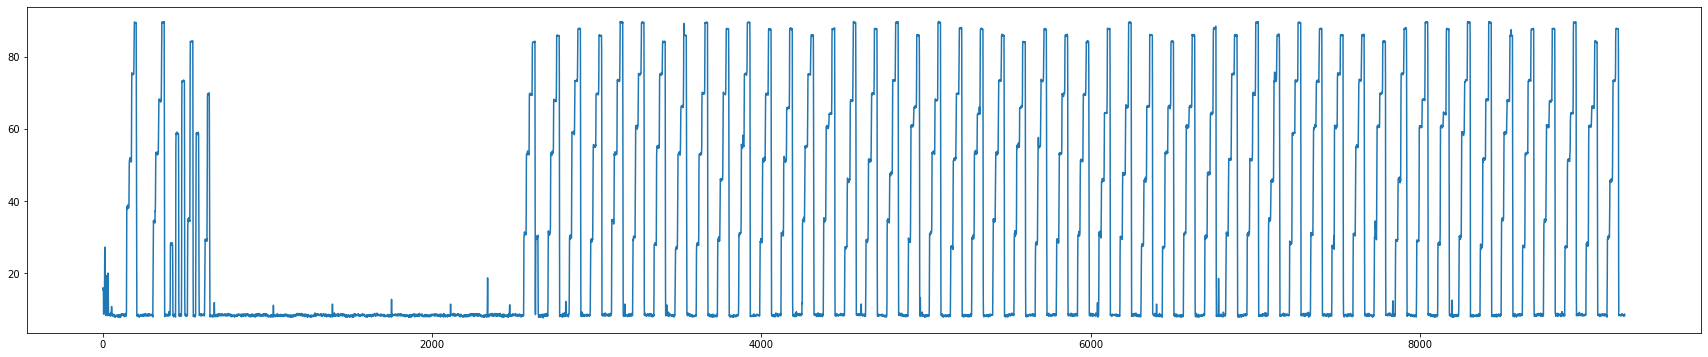

In [76]:
plt.figure(figsize = (30,6))
plt.plot(dataset[cols[0]])

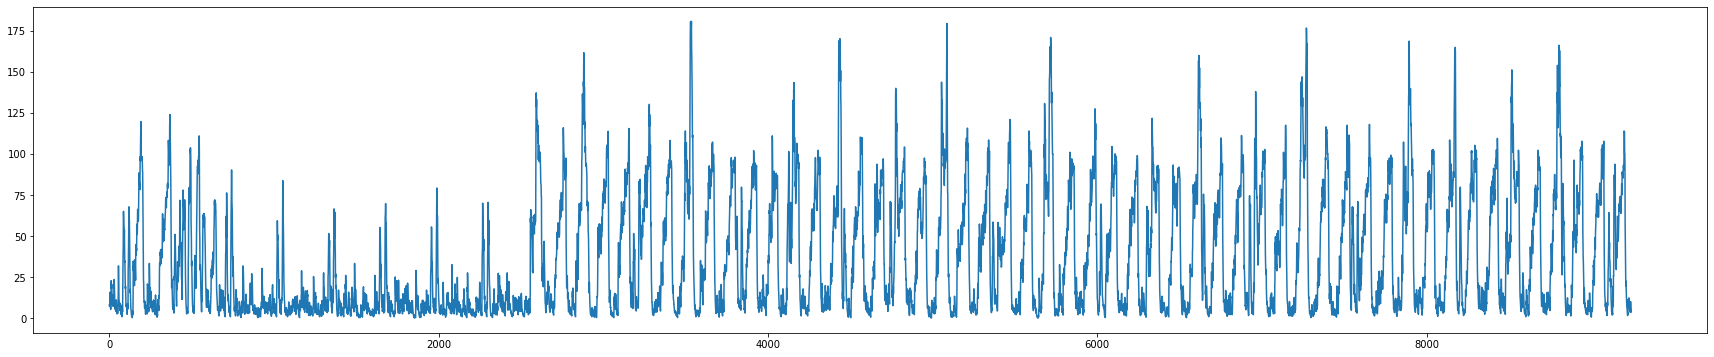

In [77]:
plt.figure(figsize = (30,6))
plt.plot(dataset[cols[1]])

In [78]:
dataset = dataset.values

In [80]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled

array([[0.1012969 , 0.04426003, 0.36243822, ..., 0.00926561, 0.03018916,
        0.01888437],
       [0.09387041, 0.03872752, 0.36985173, ..., 0.01407001, 0.03432765,
        0.18608367],
       [0.09461184, 0.05117566, 0.37149918, ..., 0.01098147, 0.01819669,
        0.21092388],
       ...,
       [0.01310272, 0.03319502, 0.12850082, ..., 0.00892244, 0.04421915,
        0.2206566 ],
       [0.01344305, 0.01936376, 0.12273476, ..., 0.00995196, 0.01390309,
        0.24041255],
       [0.00831378, 0.02627939, 0.12191104, ..., 0.00960879, 0.03795148,
        0.05273097]])

#10 look back to predict next step

In [67]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    data, labels = [], []
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequences):
            break
        seq_data = sequences[i:end_ix]
        seq_labels = sequences[end_ix:out_end_ix, 0]
        data.append(seq_data)
        labels.append(seq_labels)
    return array(data), array(labels)


In [81]:
x, y = split_sequences(dataset_scaled, 10, 1)


In [83]:
print(x.shape)
print(y.shape)

(9234, 10, 8)
(9234, 1)


In [86]:
split_point = 8000
train_x, train_y = x[:split_point, :] , y[:split_point, :]
test_x, test_y = x[split_point:, :] , y[split_point:, :]

In [87]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(8000, 10, 8)
(8000, 1)
(1234, 10, 8)
(1234, 1)


In [93]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (10,8)))
#model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
#model.add(Dropout(0.2))
#model.add(LSTM(units = 50, return_sequences = True))
#model.add(Dropout(0.2))
model.add(LSTM(units = 50))
#model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(loss='mse' , optimizer='Adam' , metrics=['mse'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 10, 50)            11800     
_________________________________________________________________
lstm_11 (LSTM)               (None, 10, 50)            20200     
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 52,251
Trainable params: 52,251
Non-trainable params: 0
_________________________________________________________________


In [94]:
history = model.fit(train_x , train_y , epochs=60,validation_data=(test_x, test_y) ,shuffle=False)

Epoch 1/60
250/250 [==============================] - 6s 10ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 2/60
250/250 [==============================] - 1s 5ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 3/60
250/250 [==============================] - 1s 5ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 4/60
250/250 [==============================] - 1s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 5/60
250/250 [==============================] - 1s 5ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 6/60
250/250 [==============================] - 1s 5ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 7/60
250/250 [==============================] - 1s 5ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 8/60
250/250 [==============================] - 1s 5ms/step - loss: 0

In [95]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

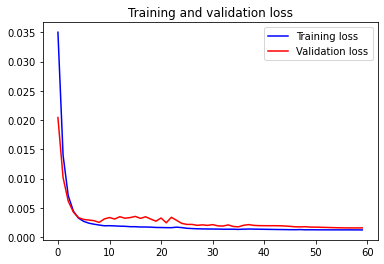

In [96]:
plot_train_history(history,'Training and validation loss')

In [97]:
model.save("mymodel.h5")

In [99]:
predicted_values = model.predict(test_x)
predicted_values
#predicted_values_scaled = scaler.inverse_transform(predicted_values)

array([[ 6.5583497e-01],
       [ 6.5639275e-01],
       [ 6.6983825e-01],
       ...,
       [ 2.6602671e-04],
       [-3.3570938e-03],
       [-1.4763400e-03]], dtype=float32)